In [96]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import seaborn as sns
import json
import seaborn as sns
import gzip
import pickle
pd.options.display.precision = 2

In [6]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=2, memory_limit='1GB')

In [7]:
client

Client Scheduler: tcp://127.0.0.1:65159 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 4.00 GB


In [29]:
path = 'patterns/2020/06/24/16'
# all_files = glob.glob(path + "/*.csv")
# li = []
# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)
# frame = pd.concat(li, axis=0, ignore_index=True)

In [30]:
brand_df = pd.read_csv('brand_info.csv')

In [36]:
brand_df.columns

Index(['safegraph_brand_id', 'brand_name', 'parent_safegraph_brand_id',
       'naics_code', 'top_category', 'sub_category', 'stock_symbol',
       'stock_exchange'],
      dtype='object')

In [39]:
categories = brand_df.groupby('top_category')

In [41]:
categories.describe()

naics_code             \
                                                        count       mean   
top_category                                                               
Accounting, Tax Preparation, Bookkeeping, and P...        5.0  541214.20   
Activities Related to Credit Intermediation              26.0  522356.92   
Administration of Human Resource Programs                 1.0  923140.00   
Advertising, Public Relations, and Related Serv...        3.0  541843.33   
Agencies, Brokerages, and Other Insurance Relat...       22.0  524210.00   
...                                                       ...        ...   
Ventilation, Heating, Air-Conditioning, and Com...        3.0  333414.00   
Warehousing and Storage                                   1.0  493130.00   
Waste Treatment and Disposal                              3.0  562214.00   
Water, Sewage and Other Systems                           1.0  221310.00   
Wired and Wireless Telecommunications Carriers           27.0  517311.96   

                                                                               \
                                                      std       min       25%   
top_category                                                                    
Accounting, Tax Preparation, Bookkeeping, and P...   2.68  541213.0  541213.0   
Activities Related to Credit Intermediation         39.47  522310.0  522310.0   
Administration of Human Resource Programs             NaN  923140.0  923140.0   
Advertising, Public Relations, and Related Serv...  28.87  541810.0  541835.0   
Agencies, Brokerages, and Other Insurance Relat...   0.00  524210.0  524210.0   
...                                                   ...       ...       ...   
Ventilation, Heating, Air-Conditioning, and Com...   1.00  333413.0  333413.5   
Warehousing and Storage                               NaN  493130.0  493130.0   
Waste Treatment and Disposal                         4.36  562211.0  562211.5   
Water, Sewage and Other Systems                       NaN  221310.0  221310.0   
Wired and Wireless Telecommunications Carriers       0.19  517311.0  517312.0   

                                                                        \
                                                         50%       75%   
top_category                                                             
Accounting, Tax Preparation, Bookkeeping, and P...  541213.0  541213.0   
Activities Related to Credit Intermediation         522390.0  522390.0   
Administration of Human Resource Programs           923140.0  923140.0   
Advertising, Public Relations, and Related Serv...  541860.0  541860.0   
Agencies, Brokerages, and Other Insurance Relat...  524210.0  524210.0   
...                                                      ...       ...   
Ventilation, Heating, Air-Conditioning, and Com...  333414.0  333414.5   
Warehousing and Storage                             493130.0  493130.0   
Waste Treatment and Disposal                        562212.0  562215.5   
Water, Sewage and Other Systems                     221310.0  221310.0   
Wired and Wireless Telecommunications Carriers      517312.0  517312.0   

                                                              
                                                         max  
top_category                                                  
Accounting, Tax Preparation, Bookkeeping, and P...  541219.0  
Activities Related to Credit Intermediation         522390.0  
Administration of Human Resource Programs           923140.0  
Advertising, Public Relations, and Related Serv...  541860.0  
Agencies, Brokerages, and Other Insurance Relat...  524210.0  
...                                                      ...  
Ventilation, Heating, Air-Conditioning, and Com...  333415.0  
Warehousing and Storage                             493130.0  
Waste Treatment and Disposal                        562219.0  
Water, Sewage and Other Systems                     221310

In [58]:
grocery_stores_df = brand_df[brand_df.top_category == 'Grocery Stores']

In [63]:
supermarket_df = grocery_stores_df[grocery_stores_df.sub_category.str.contains('Supermarkets')]

In [64]:
supermarket_df.shape

(499, 8)

In [65]:
supermarket_df

,safegraph_brand_id,brand_name,parent_safegraph_brand_id,naics_code,top_category,sub_category,stock_symbol,stock_exchange
15,SG_BRAND_52084b69a9bb91de,4 Sons Food Stores,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
30,SG_BRAND_47491621daa95546cc094e97c4e5cfb1,99 Ranch Market,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
81,SG_BRAND_227fbb906a299b8c,Acme Fresh Market,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
82,SG_BRAND_fae25d7f7192889e606c10c2b1a20adb,Acme Markets,SG_BRAND_942c238b1dddf5d40a05dbad6851b58b,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
85,SG_BRAND_5c802af4a870afe9,Acorn Markets,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
...,...,...,...,...,...,...,...,...
5685,SG_BRAND_69933e9e773fb8443e447830e200e714,Winn Dixie,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,WINN,NASDAQ
5704,SG_BRAND_84b176e53e4788892956738d7f09105b,Woodman's Market,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
5705,SG_BRAND_33c5f17a32effc27,Woods,NaN,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN
5784,SG_BRAND_25de4f248201b735,Zehrs,SG_BRAND_1b47663a692f81de,445110,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,NaN,NaN


In [67]:
supermarket_df.to_pickle("./supermarkets.pkl")

In [69]:
with gzip.open('patterns/2020/06/24/16/patterns-part1.csv.gz', 'rb') as f:
     p1 = pd.read_csv(f)  

In [78]:
p1_subset = p1.sample(5000)

In [85]:
p1_subset.visits_by_each_hour.head(3)

247170    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,0...
866640    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0...
303431    [0,0,0,0,0,0,0,1,0,0,0,1,1,0,5,0,0,2,0,1,0,0,0...
Name: visits_by_each_hour, dtype: object

In [86]:
brand_and_subset_df = p1_subset.merge(supermarket_df, left_on='safegraph_brand_ids', right_on='safegraph_brand_id')

In [95]:
top_ten_traffic = brand_and_subset_df.nlargest(10, 'raw_visit_counts')

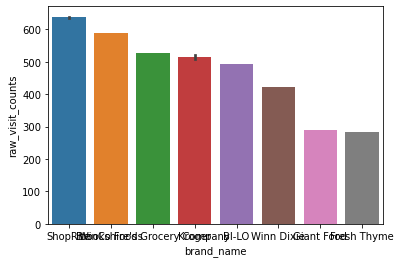

In [100]:
sns.barplot(x=top_ten_traffic.brand_name,y=top_ten_traffic.raw_visit_counts)

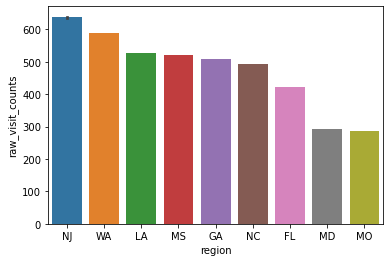

In [101]:
sns.barplot(x=top_ten_traffic.region,y=top_ten_traffic.raw_visit_counts)

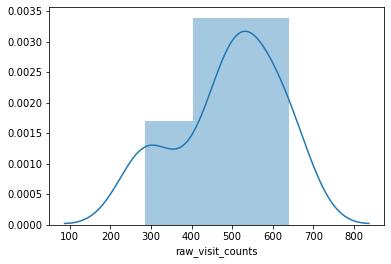

In [106]:
sns.distplot(top_ten_traffic.raw_visit_counts)